<h1>PRACTISE</h1>

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn import linear_model
import sklearn
import scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [3]:
train = pd.read_csv('titanic-train.csv')
test = pd.read_csv('titanic-test.csv')

In [4]:
sex = np.array(train['Sex'])
sex[sex == 'male'] = 0
sex[sex == 'female'] = 1
parch = np.array(train['Parch'])
sibsp = np.array(train['SibSp'])

In [5]:
train_x = np.array([sex, parch, sibsp]).T
train_y = np.array(train['Survived'])

In [6]:
test_x = np.array(test['PassengerId'])
#test_y = np.array(test['Survived'])
test_y = np.ones(len(test_x))

In [7]:
Liner = sklearn.linear_model.LogisticRegression().fit(train_x, train_y)

In [8]:
(Liner.predict(train_x) == train_y).mean()

0.7912457912457912

In [9]:
(np.zeros(len(train_y)) == train_y).mean()

0.6161616161616161

<h1>TASK 2</h1>

In [10]:
data = list()
with open('earinf.txt') as f:
    for line in f:
        line = line.replace('\t', ' ').replace('\n', '').split(' ')
        data.append(line)

In [11]:
data = np.array(data[1:])
data[:4]

array([['Occas', 'NonBeach', '15-19', 'Male', '0'],
       ['Occas', 'NonBeach', '15-19', 'Male', '0'],
       ['Occas', 'NonBeach', '15-19', 'Male', '0'],
       ['Occas', 'NonBeach', '15-19', 'Male', '0']], dtype='<U8')

In [12]:
data[data=='Occas'] = 0
data[data=='Freq']  = 1
data[data=='NonBeach'] = 0
data[data=='Beach'] = 1
data[data=='Male'] = 0
data[data=='Female'] = 1

In [13]:
for i, age in enumerate(np.unique(data[:, 2])):
    data[data==age] = i

In [14]:
for i, row in enumerate(data):
    data[i] = list(map(float, data[i]))

In [15]:
data = data.astype('float32')

In [16]:
X = sm.add_constant(data[:, :-1])
y = data[:, -1]

In [17]:
Liner = sklearn.linear_model.PoissonRegressor().fit(X, y)

In [18]:
Liner.coef_

array([ 4.99701057e-06, -1.51778295e-01, -1.23572839e-01, -6.98285964e-02,
       -9.43289645e-03])

In [19]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())

In [20]:
fit_result = poisson_model.fit()

In [21]:
fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  287
Model:                            GLM   Df Residuals:                      282
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -566.43
Date:                Mon, 11 Apr 2022   Deviance:                       760.46
Time:                        19:50:16   Pearson chi2:                     954.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8900      0.087     10.220      0.000       0.719       1.061
x1            -0.6134      0.105     -5.842      0.000      -0.819      -0.408
x2            -0.4914      0.105     -4.689      0.000      -0.697      -0.286
x3            -0.1328      0.066     -2.024      0.043      -0.261      -0.004
x4             0.0324      0.109      0.296      0.767      -0.182       0.247
==============================================================================
"""

In [22]:
Liner.coef_

array([ 4.99701057e-06, -1.51778295e-01, -1.23572839e-01, -6.98285964e-02,
       -9.43289645e-03])

<h1>TASK 3</h1>

In [23]:
data0 = list()

with open('spills.txt') as f:
    for line in f:
        line = line.replace('\t', ' ').replace('\n', '').split(' ')
        data0.append(line)
data = np.array(data0[1:]).astype('float32')

In [24]:
data0

[['Year', 'Spills', 'Oil'],
 ['1973', '36', '84.5'],
 ['1974', '48', '67.1'],
 ['1975', '45', '188.0'],
 ['1976', '29', '204.2'],
 ['1977', '49', '213.1'],
 ['1978', '35', '260.5'],
 ['1979', '65', '723.5'],
 ['1980', '32', '135.6'],
 ['1981', '33', '45.3'],
 ['1982', '9', '1.7'],
 ['1983', '17', '387.8'],
 ['1984', '15', '24.2'],
 ['1985', '8', '15.0']]

In [25]:
X_ = data[:, 1, None]
y_ = data[:, 2]

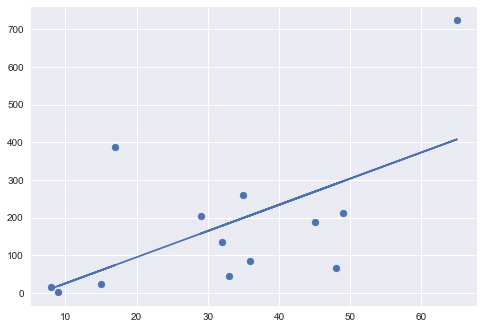

In [26]:
Liner = sklearn.linear_model.LinearRegression().fit(X_, y_)

y_new = X_[:, 0]*Liner.coef_ + Liner.intercept_

plt.plot(X_[:, 0], y_new)
plt.scatter(X_[:, 0], y_)

In [27]:
w = np.ones(len(X_))

def min_func(ab):
    result = w*(y_ - ab[0]*X_ - ab[1])**2
    
    return result.mean()

In [28]:
for i in range(100):
    min_res = scipy.optimize.minimize(min_func, [0., 0.], method='Powell')
    ab = min_res.x
    w = 1 / abs(y_ - ab[0]*X_ - ab[1])

C:\Users\nurma\AppData\Local\Temp/ipykernel_15404/1227830240.py:4: RuntimeWarning: divide by zero encountered in true_divide
  w = 1 / abs(y_ - ab[0]*X_ - ab[1])
c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in float_scalars
  tmp1 = (x - w) * (fx - fv)
c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in float_scalars
  tmp2 = (x - v) * (fx - fw)
c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:3036: RuntimeWarning: invalid value encountered in float_scalars
  if (fx2 - fval) > delta:
c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:3045: RuntimeWarning: invalid value encountered in float_scalars
  if 2.0 * (fx - fval) <= bnd:


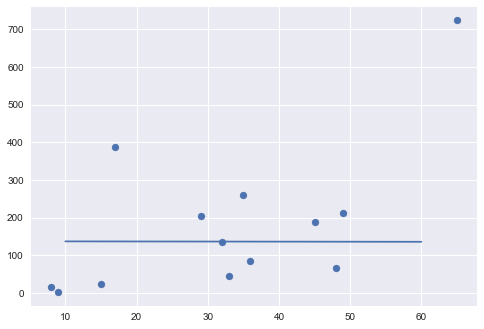

In [29]:
Liner = sklearn.linear_model.LinearRegression().fit(X_, y_)

y_new = np.array([10, 60])*ab[0] + ab[1]

plt.plot(np.array([10, 60]), y_new)
plt.scatter(X_[:, 0], y_)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [47]:
X = pd.DataFrame(X_)
y = pd.DataFrame(y_)

# generate OLS model
model = sm.WLS(y, sm.add_constant(X), weights=1/(X_**2))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

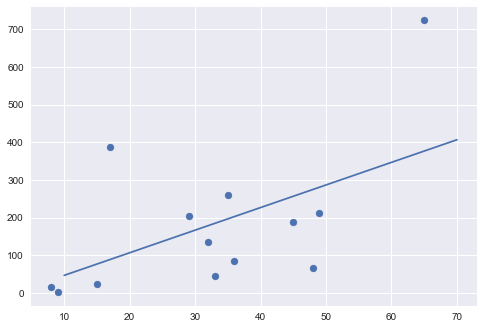

In [ ]:
y_new = model_fit.predict(sm.add_constant([10, 70]))

plt.plot(np.array([10, 70]), y_new)
plt.scatter(X_[:, 0], y_)

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


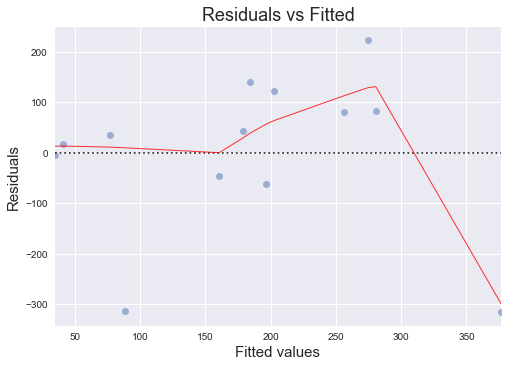

In [38]:
# model values
model_fitted_y = model_fit.predict(sm.add_constant(X_))
# model residuals
model_residuals = model_fitted_y - y_

# leverage, from statsmodels internals
#model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
#model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [39]:
def get_standartized_residuals(residuals, Xw):
    Xw = np.array(Xw)
    XTX_inverse = np.linalg.inv(Xw.T @ Xw)

    H = Xw @ XTX_inverse @ (Xw.T)
    h = np.diag(H)
    
    result = residuals/np.sqrt((residuals**2).mean()/(len(residuals) - 2)) / np.sqrt(1 - h)
    
    return result

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


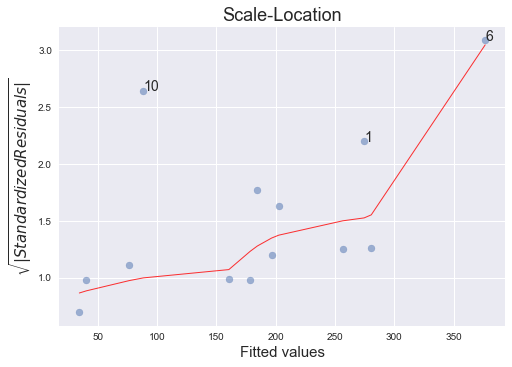

In [40]:
model_norm_residuals = get_standartized_residuals(model_residuals, sm.add_constant(X))
model_norm_residuals_abs_sqrt = np.sqrt(abs(model_norm_residuals))

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));